<a href="https://colab.research.google.com/github/carinadourado/carinadourado/blob/main/analise_exploratoria_de_dados/aula_04_wrangling_educacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling com dados de educação do Banco Mundial

### Instalando o que vamos precisar

In [ ]:
!pip install geopandas mapclassify quickda 
### Geopandas - biblioteca para trabalhar com dados geo
### mapclassify - para trabalhar com mapas temáticos
### quickda - biblioteca para acelerar as atividades de analise exploratoria

# importar os dados

In [ ]:
import pandas as pd 

In [ ]:
dados = pd.read_csv('https://s3.amazonaws.com/datascope-ast-datasets-nov29/datasets/53/data.csv')

In [ ]:
dados.head()

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017,2017-2018,2018,2019
0,AGO,Angola,495,GDP (PPP) as % of world total,Value,NaN,NaN,NaN,0.153000,0.145000,NaN,0.154000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AGO,Angola,496,GDP (PPP) as % of world total,Rank,NaN,NaN,NaN,62.000000,63.000000,NaN,63.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AGO,Angola,509,"Domestic market size index, 1-7 (best)",Value,NaN,NaN,NaN,3.428947,3.582865,NaN,3.490087,3.502455,NaN,NaN,NaN,NaN,NaN,NaN
3,AGO,Angola,510,"Domestic market size index, 1-7 (best)",Rank,NaN,NaN,NaN,72.000000,64.000000,NaN,67.000000,69.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,AGO,Angola,511,"Foreign market size index, 1-7 (best)",Value,NaN,NaN,NaN,4.743048,4.589237,NaN,4.871807,4.839048,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados.head(1)

,Country ISO3,Country Name,Indicator Id,Indicator,Subindicator Type,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017,2017-2018,2018,2019
0,AGO,Angola,495,GDP (PPP) as % of world total,Value,NaN,NaN,NaN,0.153,0.145,NaN,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Padronizar o nome das variáveis

In [ ]:
from quickda.clean_data import *

In [ ]:
dados = clean(dados, method='standardize') #ajusta o nome das colunas , padroniza.

# Obter as estatísticas descritivas

In [ ]:
from quickda.explore_data import *

In [ ]:
explore(dados, method='summarize')

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
2007-2008,float64,9112,61045,0.870,4417,0,4.03298,10,69,47842.7,65.0879,10,790.744,39.764
2008-2009,float64,9658,60499,0.862,4530,0,4,10,71,44368,70.0994,10,831.044,34.0665
2009-2010,float64,9658,60499,0.862,4537,0,3.96826,10,71,52881,110.581,10,1567.82,23.6465
2010-2011,float64,10686,59471,0.848,5140,0,3.92214,10,74,47481.5,108.975,10,1496.23,23.3771
2011-2012,float64,10917,59240,0.844,5177,0,3.91689,11,76,47481.5,108.233,11,1480.36,23.628
2012-2013,float64,11071,59086,0.842,5334,0,3.92134,11,76,39709.6,100.831,11,1294.78,23.7455
2013-2014,float64,12270,57887,0.825,5915,0,3.88124,10,78,37575.1,94.5501,10,1166.69,24.2386
2014-2015,float64,11588,58569,0.835,5654,0,3.9261,10.8389,75,38423.7,87.315,10.8389,1050.98,25.33
2015-2016,float64,11264,58893,0.839,5490,0,3.93666,10.65,73,38423.7,87.2062,10.65,1069.65,24.8225
2016-2017,float64,11092,59065,0.842,5408,0,3.99668,10,72,42725,87.6195,10,1156.59,27.0736


# Filtrar

In [ ]:
dados.head(1)

,country_iso3,country_name,indicator_id,indicator,subindicator_type,2007-2008,2008-2009,2009-2010,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017,2017-2018,2018,2019
0,AGO,Angola,495,GDP (PPP) as % of world total,Value,NaN,NaN,NaN,0.153,0.145,NaN,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dados.columns

Index(['country_iso3', 'country_name', 'indicator_id', 'indicator',
       'subindicator_type', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017', '2017-2018', '2018', '2019'],
      dtype='object')

In [ ]:
remover = ['2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017', '2017-2018', '2018']

In [ ]:
dados = clean(dados, method='dropcols', columns=remover)

In [ ]:
dados.head(1)

,country_iso3,country_name,indicator_id,indicator,subindicator_type,2019
0,AGO,Angola,495,GDP (PPP) as % of world total,Value,NaN


In [ ]:
dados['subindicator_type'].unique()

### ou

# set(dados['subindicator_type'])

array(['Value', 'Rank', 'Index 1-7 (best)', 'Score'], dtype=object)

In [ ]:
dados = dados.query(" subindicator_type == 'Value' ")                          

In [ ]:
dados.head(1)

,country_iso3,country_name,indicator_id,indicator,subindicator_type,2019
0,AGO,Angola,495,GDP (PPP) as % of world total,Value,NaN


In [ ]:
dados['indicator'].unique()

In [ ]:
dados = dados.query("indicator == 'GCI 4.0: Pupil-to-teacher ratio in primary education'  ")

In [ ]:
dados.head()

,country_iso3,country_name,indicator_id,indicator,subindicator_type,2019
135,AGO,Angola,41406,GCI 4.0: Pupil-to-teacher ratio in primary edu...,Value,50.029511
634,ALB,Albania,41406,GCI 4.0: Pupil-to-teacher ratio in primary edu...,Value,17.944780
1134,ARE,United Arab Emirates,41406,GCI 4.0: Pupil-to-teacher ratio in primary edu...,Value,24.522779
1633,ARG,Argentina,41406,GCI 4.0: Pupil-to-teacher ratio in primary edu...,Value,17.000000
2137,ARM,Armenia,41406,GCI 4.0: Pupil-to-teacher ratio in primary edu...,Value,17.600000


In [ ]:
explore(dados, method='summarize')

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
2019,float64,135,3,0.022,135,8.30333,13.1276,18.4051,28.3979,69.5097,22.6543,18.4051,12.4649,1.3249
country_iso3,object,138,0,0.000,138,AGO,-,-,-,ZWE,-,-,-,-
country_name,object,138,0,0.000,138,Albania,-,-,-,Zimbabwe,-,-,-,-
indicator,object,138,0,0.000,1,GCI 4.0: Pupil-to-teacher ratio in primary edu...,-,-,-,GCI 4.0: Pupil-to-teacher ratio in primary edu...,-,-,-,-
indicator_id,int64,138,0,0.000,1,41406,41406,41406,41406,41406,41406,41406,0,0
subindicator_type,object,138,0,0.000,1,Value,-,-,-,Value,-,-,-,-


In [ ]:
dados = clean(dados, method='dropmissing')


In [ ]:
dados.head(1)

,country_iso3,country_name,indicator_id,indicator,subindicator_type,2019
135,AGO,Angola,41406,GCI 4.0: Pupil-to-teacher ratio in primary edu...,Value,50.029511


# Dados Geo

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline #quero os graficos no notebook

In [ ]:
mundo = gpd.read_file('WB_countries_Admin0_topojson.json')

In [ ]:
mundo.head()

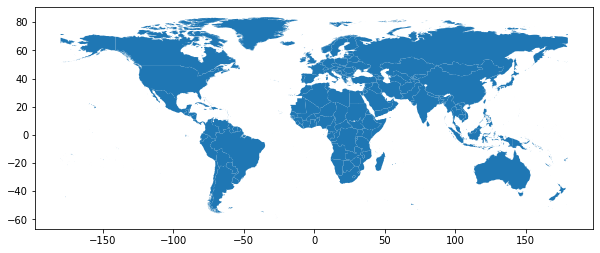

In [ ]:
mundo.plot(figsize=(10,5))
plt.show()

In [ ]:
mundo.head(1)

,id,FID,OBJECTID,featurecla,LEVEL,TYPE,FORMAL_EN,FORMAL_FR,POP_EST,POP_RANK,GDP_MD_EST,POP_YEAR,LASTCENSUS,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10_,ISO_A2,ISO_A3,ISO_A3_EH,ISO_N3,UN_A3,WB_A2,WB_A3,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FR,NAME_EL,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,WB_NAME,WB_RULES,WB_REGION,Shape_Leng,Shape_Area,geometry
0,0,0,1,Admin-0 country,2,Sovereign country,Republic of Indonesia,,260580739,17,3028000.0,2017,2010,2016,4. Emerging region: MIKT,4. Lower middle income,ID,ID,IDN,IDN,360,360,ID,IDN,Asia,Asia,South-Eastern Asia,East Asia & Pacific,إندونيسيا,ইন্দোনেশিয়া,Indonesien,Indonesia,Indonesia,Indonésie,Ινδονησία,इंडोनेशिया,Indonézia,Indonesia,Indonesia,インドネシア,인도네시아,Indonesië,Indonezja,Indonésia,Индонезия,Indonesien,Endonezya,Indonesia,印度尼西亚,Indonesia,None,EAP,495.029918,153.078608,"MULTIPOLYGON (((117.67777 4.15892, 117.71377 4..."


In [ ]:
mundo = mundo[['ISO_A3', 'CONTINENT', 'INCOME_GRP', 'geometry']]

In [ ]:
mundo.head(1)

,ISO_A3,CONTINENT,INCOME_GRP,geometry
0,IDN,Asia,4. Lower middle income,"MULTIPOLYGON (((117.67777 4.15892, 117.71377 4..."


In [ ]:
dados.head(1)

,country_iso3,country_name,indicator_id,indicator,subindicator_type,2019
135,AGO,Angola,41406,GCI 4.0: Pupil-to-teacher ratio in primary edu...,Value,50.029511


In [ ]:
dados_geo = pd.merge(dados, mundo, left_on = 'country_iso3', right_on = 'ISO_A3')

In [ ]:
dados_geo.head()

In [ ]:
# Preciso fazer com que dados_geo seja um GeoPandas novamente

dados_geo = gpd.GeoDataFrame(dados_geo, geometry='geometry', crs=mundo.crs)

In [ ]:
dados_geo.head(1)

In [ ]:
dados_geo.plot(column='2019')

# Gráfico

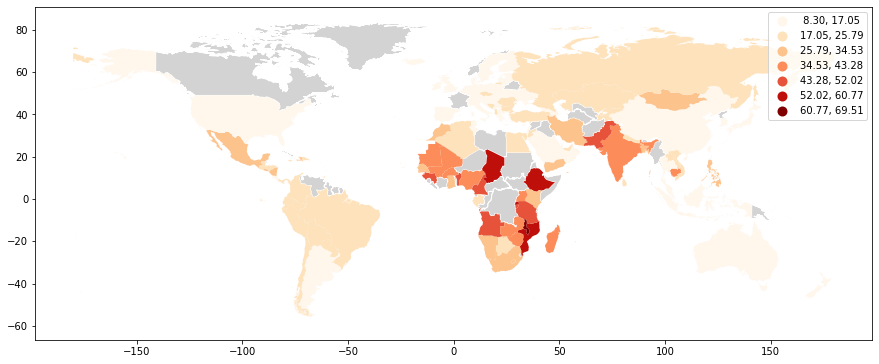

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_facecolor('white')
mundo.plot(ax = ax, color='lightgray', edgecolor='white')
dados_geo.plot(ax = ax , column='2019', cmap='OrRd', scheme='equal_interval', k=7, legend=True)

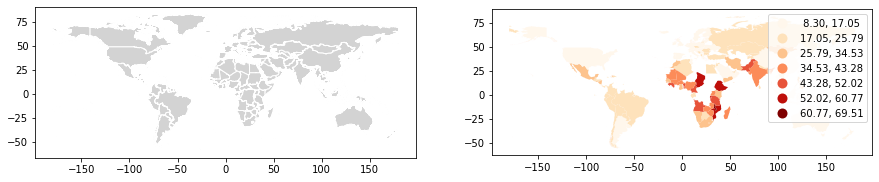

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
mundo.plot(ax = ax[0], color='lightgray', edgecolor='white')
dados_geo.plot(ax = ax[1] , column='2019', cmap='OrRd', scheme='equal_interval', k=7, legend=True)